In [38]:
import glob

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import cmocean

In [2]:
weight_fraction_file = '/g/data/wp00/users/dbi599/agcd_v1_precip_weight_r005_obs-fraction_1960-1979.nc'

In [55]:
example_lat1 = -28
example_lon1 = 127.65

example_lat2 = -23
example_lon2 = 125.3

In [42]:
ds = xr.open_dataset(weight_fraction_file)

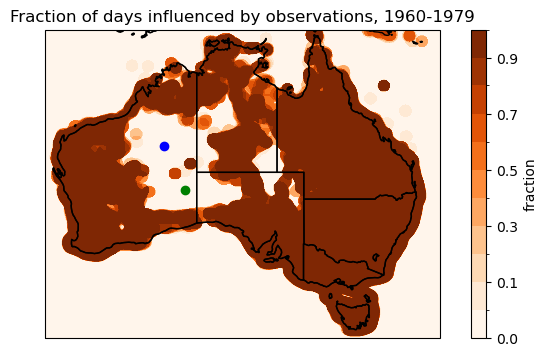

In [82]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds['fraction'].plot.contourf(
    ax=ax,
    levels=[0, 0.00001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label': 'fraction'},
    cmap='Oranges'
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.plot(example_lon1, example_lat1, 'go', zorder=5, transform=ccrs.PlateCarree())
ax.plot(example_lon2, example_lat2, 'bo', zorder=5, transform=ccrs.PlateCarree())
plt.title('Fraction of days influenced by observations, 1960-1979')

plt.savefig(
    'obs_fraction_example.png',
    bbox_inches='tight',
    facecolor='white',
)

In [102]:
weight_files1 = glob.glob('/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_19[8,9]?.nc')
weight_files2 = glob.glob('/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_200?.nc')
weight_files = weight_files1 + weight_files2 
weight_files.sort()
weight_files = weight_files[1:] + ['/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_2010.nc']
weight_files

['/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1981.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1982.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1983.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1984.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1985.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1986.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1987.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1988.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1989.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1990.nc',
 '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1991.nc',
 '/g/data/

In [103]:
ds_weight = xr.open_mfdataset(weight_files)

In [104]:
ds_weight_annual_max = ds_weight['weight'].max('time', keep_attrs=True)
ds_weight_annual_max = ds_weight_annual_max.compute()

In [105]:
ds_weight_annual_min = ds_weight['weight'].min('time', keep_attrs=True)
ds_weight_annual_min = ds_weight_annual_min.compute()

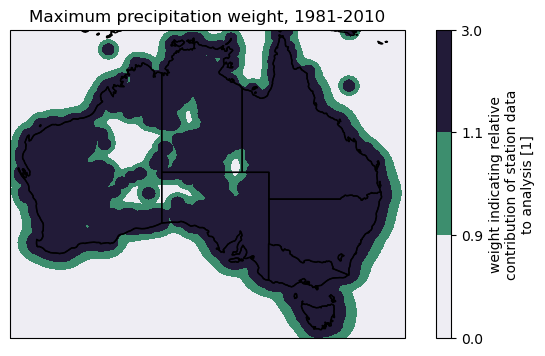

In [106]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds_weight_annual_max.plot.contourf(
    ax=ax,
    levels=[0, 0.9, 1.1, 3.0],
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.rain,
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
#ax.plot(example_lon1, example_lat1, 'go', zorder=5, transform=ccrs.PlateCarree())
#ax.plot(example_lon2, example_lat2, 'bo', zorder=5, transform=ccrs.PlateCarree())
plt.title('Maximum precipitation weight, 1981-2010')
plt.show()

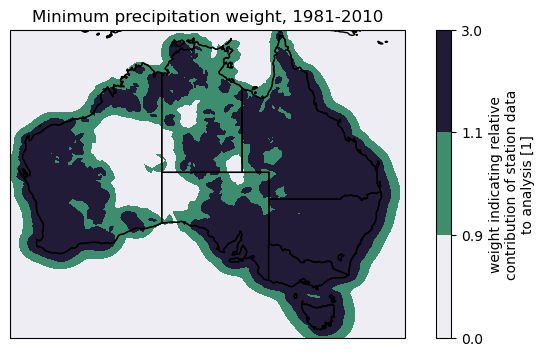

In [107]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds_weight_annual_min.plot.contourf(
    ax=ax,
    levels=[0, 0.9, 1.1, 3.0],
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.rain,
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
#ax.plot(example_lon1, example_lat1, 'go', zorder=5, transform=ccrs.PlateCarree())
#ax.plot(example_lon2, example_lat2, 'bo', zorder=5, transform=ccrs.PlateCarree())
plt.title('Minimum precipitation weight, 1981-2010')
plt.show()

In [14]:
pr_files = glob.glob('/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_19[6,7]?.nc')
pr_files.sort()
pr_files

['/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1960.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1961.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1962.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1963.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1964.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1965.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1966.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1967.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1968.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1969.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1970.nc',
 '/g/data/zv2/agcd/v1/precip/tot

In [63]:
ds_pr = xr.open_mfdataset(pr_files)

In [64]:
ds_pr_annual_mean = ds_pr['precip'].mean('time', keep_attrs=True)

In [65]:
ds_pr_annual_mean = ds_pr_annual_mean.compute()

In [71]:
ds_pr_monthly_mean = ds_pr['precip'].groupby("time.month").mean("time")

In [74]:
ds_pr_monthly_mean = ds_pr_monthly_mean.compute()

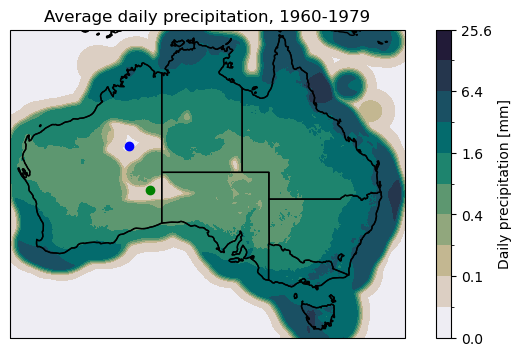

In [56]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds_pr_annual_mean.plot.contourf(
    ax=ax,
    levels=[0, 0.0001, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6],
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.rain,
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.plot(example_lon1, example_lat1, 'go', zorder=5, transform=ccrs.PlateCarree())
ax.plot(example_lon2, example_lat2, 'bo', zorder=5, transform=ccrs.PlateCarree())
plt.title('Annual mean daily precipitation, 1960-1979')
plt.show()

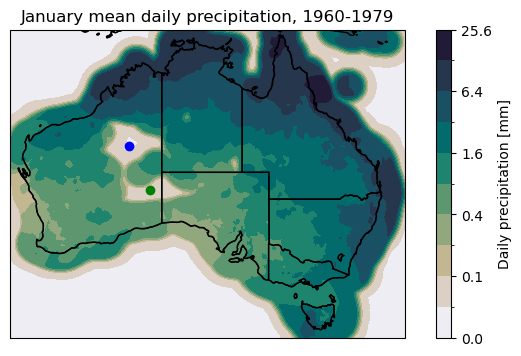

In [73]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds_pr_monthly_mean.sel(month=1).plot.contourf(
    ax=ax,
    levels=[0, 0.0001, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6],
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.rain,
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.plot(example_lon1, example_lat1, 'go', zorder=5, transform=ccrs.PlateCarree())
ax.plot(example_lon2, example_lat2, 'bo', zorder=5, transform=ccrs.PlateCarree())
plt.title('January mean daily precipitation, 1960-1979')
plt.show()

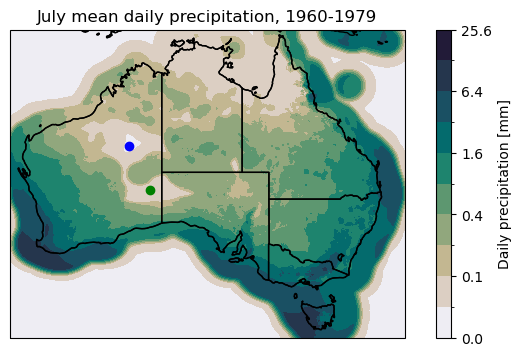

In [75]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds_pr_monthly_mean.sel(month=7).plot.contourf(
    ax=ax,
    levels=[0, 0.0001, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6],
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.rain,
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.plot(example_lon1, example_lat1, 'go', zorder=5, transform=ccrs.PlateCarree())
ax.plot(example_lon2, example_lat2, 'bo', zorder=5, transform=ccrs.PlateCarree())
plt.title('July mean daily precipitation, 1960-1979')
plt.show()

In [58]:
da_pr_point1 = ds_pr['precip'].sel({'lat': example_lat1, 'lon': example_lon1}, method='nearest')
da_pr_point2 = ds_pr['precip'].sel({'lat': example_lat2, 'lon': example_lon2}, method='nearest')

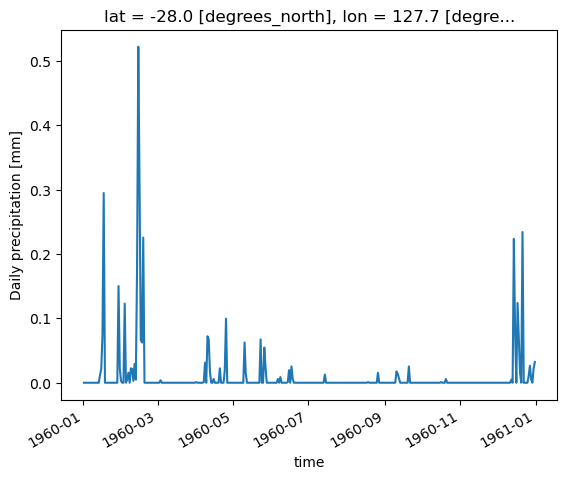

In [108]:
da_pr_point1.sel(time=slice('1960-01-01', '1960-12-31')).plot()
plt.show()

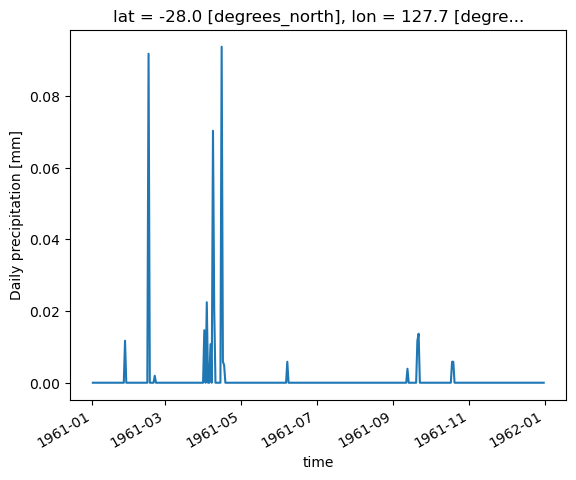

In [109]:
da_pr_point1.sel(time=slice('1961-01-01', '1961-12-31')).plot()
plt.show()

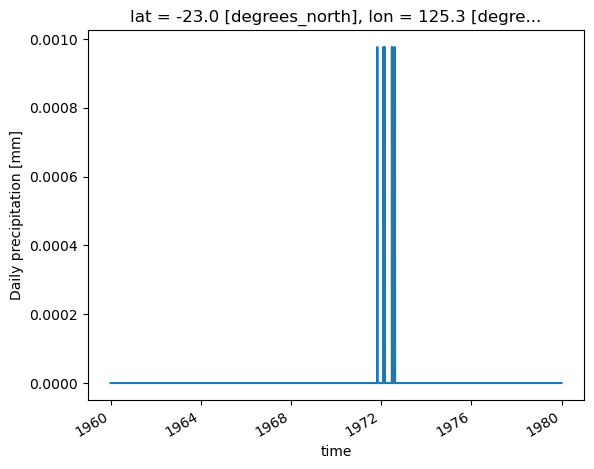

In [62]:
da_pr_point2.plot()
plt.show()

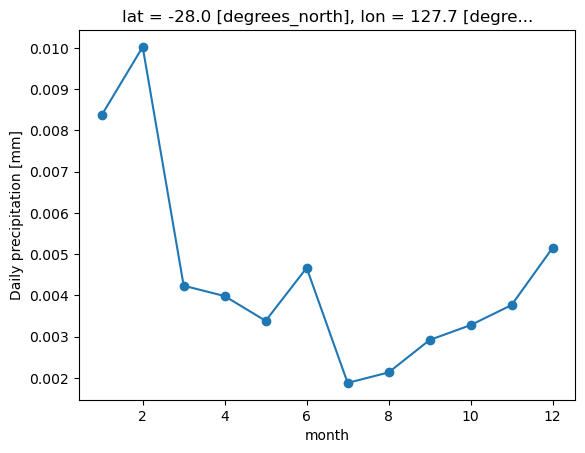

In [80]:
ds_pr_monthly_mean.sel({'lat': example_lat1, 'lon': example_lon1}, method='nearest').plot(marker='o')
plt.show()

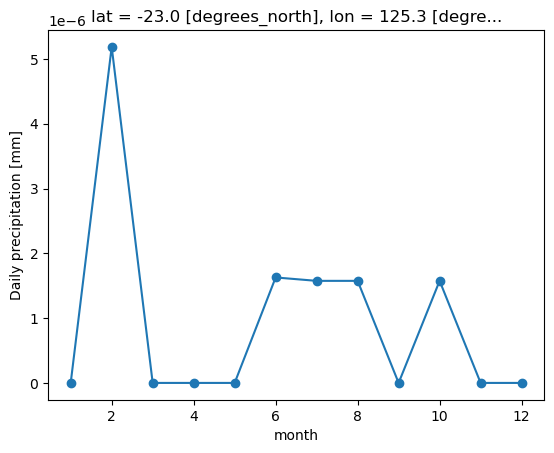

In [79]:
ds_pr_monthly_mean.sel({'lat': example_lat2, 'lon': example_lon2}, method='nearest').plot(marker='o')
plt.show()